# Algorithmic Bias 


In [1]:
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn.model_selection import train_test_split
bcDB = datasets.load_breast_cancer()

In [2]:
bcDF = pd.DataFrame(bcDB.data, columns= list(bcDB['feature_names']))
bcDF['target'] = pd.Series(bcDB.target)
bcDF = bcDF.sort_values(by = ['target'])
bcDF = bcDF.reset_index(drop=True)
bcDF.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.1184,0.2776,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,14.22,23.12,94.37,609.9,0.1075,0.2413,0.1981,0.06618,0.2384,0.07542,...,37.18,106.4,762.4,0.1533,0.9327,0.8488,0.1772,0.5166,0.14460,0
2,12.34,26.86,81.15,477.4,0.1034,0.1353,0.1085,0.04562,0.1943,0.06937,...,39.34,101.7,768.9,0.1785,0.4706,0.4425,0.1459,0.3215,0.12050,0
3,14.86,23.21,100.40,671.4,0.1044,0.1980,0.1697,0.08878,0.1737,0.06672,...,27.78,118.6,784.7,0.1316,0.4648,0.4589,0.1727,0.3000,0.08701,0
4,13.77,22.29,90.63,588.9,0.1200,0.1267,0.1385,0.06526,0.1834,0.06877,...,34.01,111.6,806.9,0.1737,0.3122,0.3809,0.1673,0.3080,0.09333,0


In [3]:
vc = bcDF['target'].value_counts()
for i,j in enumerate(bcDB.target_names):
    print (vc[i],j)

212 malignant
357 benign


In [4]:
y = bcDF.pop('target').values
X = bcDF.values
X.shape, y.shape

((569, 30), (569,))

## $k$-NN
Malignant is the minority class at ~40%. k-NN classifier picks up this under-representation and accentuates it, predicting just 36% malignant. 
k-NN classifier is bais towards the majority class as the predicted score is 36%.

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

kNN = KNeighborsClassifier(n_neighbors=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)
y_pred = kNN.fit(X_train, y_train).predict(X_test)
print(X_train.shape,X_test.shape)

y_test.sum()/len(y_test)

print("Malignant in test set : %0.2f" % (1- (y_test.sum()/len(y_test))))
print("Predicted malignant : %0.2f" % (1- (y_pred.sum()/len(y_pred))))

(426, 30) (143, 30)
Malignant in test set : 0.40
Predicted malignant : 0.36


# Decision Tree Classifier
Malignant is the minority class at ~40%. Decision Tree Classifier picks up this under-representation and accentuates it, predicting just 38% malignant. Decision Tree Classifier is also slighly bias towards the majority class as the predicted score is 38%. 

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

DT = DecisionTreeClassifier(criterion='entropy')

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)
y_pred = DT.fit(X_train, y_train).predict(X_test)
print(X_train.shape,X_test.shape)

y_test.sum()/len(y_test)

print("Malignant in test set : %0.2f" % (1- (y_test.sum()/len(y_test))))
print("Predicted malignant : %0.2f" % (1- (y_pred.sum()/len(y_pred))))


(426, 30) (143, 30)
Malignant in test set : 0.40
Predicted malignant : 0.41


# Logistic Regression
Malignant is the minority class at ~40%.  
Logistic Regression Classifier picks up this under-representation and accentuates it, predicting just 37% malignant. 
Logistic Regression Classifier is also bias towards the majority class as the predicted score is 37%.

In [7]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(solver = 'liblinear')

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)
y_pred = LR.fit(X_train, y_train).predict(X_test)
print(X_train.shape,X_test.shape)

y_test.sum()/len(y_test)

print("Malignant in test set : %0.2f" % (1- (y_test.sum()/len(y_test))))
print("Predicted malignant : %0.2f" % (1- (y_pred.sum()/len(y_pred))))

(426, 30) (143, 30)
Malignant in test set : 0.40
Predicted malignant : 0.37


# Gaussian Naive Bayes
Naive Bayes is probability based learning. 
Malignant is the minority class at ~40%.  
Gaussian Naive Bayes picks up this under-representation and accentuates it, predicting just 39% malignant. 
Gaussian Naive Bayes is very slighly bias towards the majority class as the predicted score is 39%.

In [8]:
from sklearn.naive_bayes import GaussianNB

m3 = GaussianNB()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)
y_pred = m3.fit(X_train, y_train).predict(X_test)
print(X_train.shape,X_test.shape)

y_test.sum()/len(y_test)

print("Malignant in test set : %0.2f" % (1- (y_test.sum()/len(y_test))))
print("Predicted malignant : %0.2f" % (1- (y_pred.sum()/len(y_pred))))

(426, 30) (143, 30)
Malignant in test set : 0.40
Predicted malignant : 0.39


# Multinomial Naive Bayes
Malignant is the minority class at ~40%.  
Multinomial Naive Bayes picks up this under-representation and accentuates it, predicting just 30% malignant.
Multinomail Naive Bayes is highly bias towards the majority class as the predicted score is 30%.

In [9]:
from sklearn.naive_bayes import MultinomialNB

m1 = MultinomialNB()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)
y_pred = m1.fit(X_train, y_train).predict(X_test)
print(X_train.shape,X_test.shape)

y_test.sum()/len(y_test)

print("Malignant in test set : %0.2f" % (1- (y_test.sum()/len(y_test))))
print("Predicted malignant : %0.2f" % (1- (y_pred.sum()/len(y_pred))))

(426, 30) (143, 30)
Malignant in test set : 0.40
Predicted malignant : 0.30


# Complement Naive Bayes
Malignant is the minority class at ~40%.  
Complement Naive Bayes picks up this under-representation and accentuates it, predicting just 31% malignant.
Complement Naive Bayes is highly bias towards the majority class as the predicted score is 31%.

In [10]:
from sklearn.naive_bayes import ComplementNB

m2 = ComplementNB()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)
y_pred = m2.fit(X_train, y_train).predict(X_test)
print(X_train.shape,X_test.shape)

y_test.sum()/len(y_test)

print("Malignant in test set : %0.2f" % (1- (y_test.sum()/len(y_test))))
print("Predicted malignant : %0.2f" % (1- (y_pred.sum()/len(y_pred))))


(426, 30) (143, 30)
Malignant in test set : 0.40
Predicted malignant : 0.31


# Hold Out Testing
The dataset is divided into train set and test set. In this, I have set the test_size to 0.2. So, 80% data is for training and 20% of data is for testing. Test data is used to see how well does the model performs. The accuracy score is calculated for test set. 
Logestic Regression has heighest accuracy of 94%. Multinomail and complement naive bayes has lowest accuracy of 87%.
Accuracy score is not enough to justify the bias, as the predicted value might be because of the majority class.


In [11]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

models = [kNN,DT,LR,m3,m1,m2]

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, random_state=2, test_size=0.2)
print('Accuracy Score')
for m in models:
    mm = m.fit(X_train1, y_train1)
    y_pred1 = mm.predict(X_test1)
    a = accuracy_score(y_test1, y_pred1) 
    print("The accuracy score on Test set {:22} {:.2f}".format(type(m).__name__, a)) 

Accuracy Score
The accuracy score on Test set KNeighborsClassifier   0.91
The accuracy score on Test set DecisionTreeClassifier 0.92
The accuracy score on Test set LogisticRegression     0.94
The accuracy score on Test set GaussianNB             0.88
The accuracy score on Test set MultinomialNB          0.87
The accuracy score on Test set ComplementNB           0.87


# Cross Validation 
In cross validation the data set is split into k folds and the each fold or group is used as the test set and the rest as training set. Here, the folds is set to 4, so this is 4-folds corss validation. Logistic Regression has the lowest false positive, 8% and true positive of 97%. 

The TN rate of k-NN classifier is 87% and it's TP rate is 96%, so this classifier is baised towards the majority class.

The TN rate of  Decision Tree Classfier is 90% and it's TP rate is 94%, so the classifier is not much baised towards the majority class.

The TN rate of Logistic Regression Classifier is 92% and it's TP rate is 97%, so this classifier is slightly baised towards the majority class.

The TN rate of Gaussian Naive Bayes Classifier is 89% and it's TP rate is 97%, so this classifier is highly baised towards the majority class.

The TN rate of Multinomial Naive Bayes Classifier is 77% and it's TP rate is 97%, so this classifier is the most baised towards the majority class.

The TN rate of Complement Naive Bayes Classifier is 77% and it's TP rate is 97%, so this classifier is the most baised towards the majority class.


In [12]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix
def tp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 1]
def tn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 0]
def fp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 1]
def fn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 0]
scoring = {'tp' : make_scorer(tp), 'tn' : make_scorer(tn),
           'fp' : make_scorer(fp), 'fn' : make_scorer(fn)}

models = [kNN,DT,LR,m3,m1,m2]

folds = 4
v = 0 

In [13]:
TNP = []
for m in models:
    cv_results = cross_validate(m, X, y, cv= folds,scoring=scoring, return_train_score=False, 
                                    verbose = v, n_jobs = -1)
    fp_rate = cv_results['test_fp'].sum()/(cv_results['test_fp'].sum()+cv_results['test_tn'].sum())
    tp_rate = cv_results['test_tp'].sum()/(cv_results['test_tp'].sum()+cv_results['test_fn'].sum())
    tn_rate = cv_results['test_tn'].sum()/(cv_results['test_tn'].sum()+cv_results['test_fp'].sum())
    TNP.append(round(tn_rate,2))
  
    print("{} x CV {:22} FP: {:.2f}  TP: {:.2f} TN: {:.2f}".format(folds, type(m).__name__, fp_rate, tp_rate, tn_rate)) 

4 x CV KNeighborsClassifier   FP: 0.13  TP: 0.96 TN: 0.87
4 x CV DecisionTreeClassifier FP: 0.09  TP: 0.94 TN: 0.91
4 x CV LogisticRegression     FP: 0.08  TP: 0.97 TN: 0.92
4 x CV GaussianNB             FP: 0.11  TP: 0.97 TN: 0.89
4 x CV MultinomialNB          FP: 0.23  TP: 0.97 TN: 0.77
4 x CV ComplementNB           FP: 0.23  TP: 0.97 TN: 0.77


# Classifier Predicted Score Plot
The graph is plotted below. 

It can be observed that Logestic Regression has the highest TN rate, 92%. This classifier is slightly baised towards the majority class.

Decision Tree Classifier has the TN rate of 90%. This classifer is also slightly baised towards the majority class.

k-NN classifier has the TN rate of 87%. This classifer is baised towards the majority class.

Gaussian Naive Bayes Classifier has the TN rate of 89%. This classifer is highly baised towards the majority class.

Multinomial and Complement Naive Bayes Classifier has the TN rate of 77%. These classifers are the most baised towards the majority class.


[0.87, 0.91, 0.92, 0.89, 0.77, 0.77]


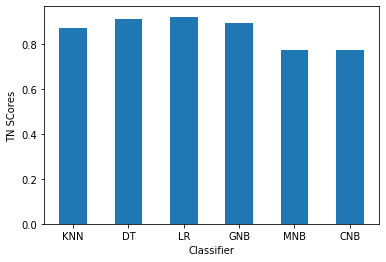

<Figure size 432x288 with 0 Axes>

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

Yplot = TNP
print(Yplot)
plt.xlabel('Classifier')
plt.ylabel('TN SCores')
plt.bar(['KNN', 'DT', 'LR', 'GNB', 'MNB', 'CNB'], Yplot, 0.5)
plt.figure()
plt.show()

# Over Sampling
Random over sampler is used to overcome the bias. This generates artificial data and overcomes the bias. The random state is set to 2. 

In [16]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=2)
X_resampled, y_resampled = ros.fit_resample(X, y)
print(X_resampled.shape, y_resampled.shape)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, random_state=2)

(714, 30) (714,)


The malignant is now balanced class at 50%. 

Oversampling has balanced the data. 

The predicted Maligant using k-NN classifier is 45%, so it has almost overcome the bias.


The predicted Maligant using Decision Tree classifier is 51%, it has overcomed the bias, but now it is based towards the minority class.


The predicted Maligant using Logistic Regression classifier is 46%, so it has almost overcome the bias.


The predicted Maligant using Gaussian Naive Bayes classifier is 44%, which shows the classifier is still biased.


The predicted Maligant using Multinomial Naive Bayes Classifier is 37%, Which shows that the classifier is biased. 


The predicted Maligant using Complement Naive Bayes classifier is 37%, Which shows that the classifier is biased. 

In [17]:
models = [kNN,DT,LR,m3,m1,m2]
for m in models:
    print(type(m).__name__)

    y_pred = m.fit(X_train, y_train).predict(X_test)
    print(X_train.shape,X_test.shape)
    y_test.sum()/len(y_test)
    print("Malignant in test set : %0.2f" % (1- (y_test.sum()/len(y_test))))
    print("Predicted malignant : %0.2f" % (1- (y_pred.sum()/len(y_pred))))

KNeighborsClassifier
(535, 30) (179, 30)
Malignant in test set : 0.50
Predicted malignant : 0.45
DecisionTreeClassifier
(535, 30) (179, 30)
Malignant in test set : 0.50
Predicted malignant : 0.50
LogisticRegression
(535, 30) (179, 30)
Malignant in test set : 0.50
Predicted malignant : 0.46
GaussianNB
(535, 30) (179, 30)
Malignant in test set : 0.50
Predicted malignant : 0.44
MultinomialNB
(535, 30) (179, 30)
Malignant in test set : 0.50
Predicted malignant : 0.37
ComplementNB
(535, 30) (179, 30)
Malignant in test set : 0.50
Predicted malignant : 0.37


# Hold Out Testing
The overall accuracy of all the classifiers improved. 

Logistic regression Classifier has 95% accuracy. This classifier has the highest accuracy.

Decision tree Classifier has 94% accuracy.

Gaussian Naive Bayes Classifier has 93% accuracy.

k-NN Classifier has 92% accuracy.


Multinomial and Complement Naive Bayes Classifier has 85% accuracy. These classifiers have the lowest accuracy. 

The accuracy scores of all classifiers improved after oversampling. Oversampling produced a balanced dataset. Multinomial and Complement Naive Bayes Classifier are still biased after oversampling.



In [18]:
from sklearn.metrics import accuracy_score

models = [kNN,DT,LR,m3,m1,m2]

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, random_state=0, test_size=1/3)
print('Accuraqcy Score')
for m in models:
    mm = m.fit(X_train, y_train)
    y_pred = mm.predict(X_test)
    f1s = accuracy_score(y_test, y_pred) 
    print("Accuracy Score on Test set {:22} {:.2f}".format(type(m).__name__, f1s)) 

Accuraqcy Score
Accuracy Score on Test set KNeighborsClassifier   0.92
Accuracy Score on Test set DecisionTreeClassifier 0.94
Accuracy Score on Test set LogisticRegression     0.95
Accuracy Score on Test set GaussianNB             0.93
Accuracy Score on Test set MultinomialNB          0.85
Accuracy Score on Test set ComplementNB           0.85



The minority class in the dataset is reviewNotHelpfulness, at 38%.

Predicted score for the minority class using k-NN classifier is 30%. The classifier is biased towards the majority class.

Predicted score for the minority class using Decision Tress classifier is 27%. The classifier is highly biased towards the majority class.

Predicted score for the minority class using Logistic Regression classifier is 21%. The classifier is highy biased towards the majority class.

Predicted score for the minority class using Gaussian Naive Bayes classifier is 35%. The classifier is slightly biased towards the majority class.

Logistic Regression Classifier is most biased.

In [19]:
hotel = pd.read_csv('HotelRevHelpfulnessV2.csv')
y = hotel.pop('reviewHelpfulness').values
X = hotel.values
hotel.head()

,aveHelpfulnessRatioUser,stdevHelpfulnessRatioUser,pcReviewsExceedMinHelpfulnessSupport,numReviewsUser,numReviewsHotel,ratingUser,numberSubRatingsUser,subRatingMeanUser,subRatingStdevUser,aveRatingUser,...,completeness_1,completeness_2,completeness_3,numberTermsEntry,percentageAlphaCharsEntry,fractionUpperCaseCharsEntry,fractionYouVsIEntry,numberTermsSummaryQuote,percentageAlphaCharsSummaryQuote,fractionUpperCaseCharsSummaryQuote
0,1.000000,0.000000,0.666667,3,16,5,4,4.000000,0.000000,4.333333,...,2,0,1,182,0.788474,0.025703,0.500000,6,0.815789,0.096774
1,0.772487,0.377321,0.500000,12,233,5,0,0.000000,0.000000,4.333333,...,2,0,0,158,0.791888,0.012594,0.500000,1,1.000000,0.083333
2,0.715473,0.300437,0.833333,12,302,4,7,3.714286,0.755929,4.166667,...,5,0,3,59,0.799639,0.024831,0.333333,4,0.828571,0.034483
3,0.521250,0.481675,0.222222,36,6,1,4,1.000000,0.000000,3.527778,...,2,0,0,95,0.782212,0.029155,0.500000,2,0.800000,0.062500
4,0.603175,0.246926,1.000000,2,271,3,0,0.000000,0.000000,3.500000,...,0,0,0,43,0.805128,0.028662,0.000000,1,1.000000,0.142857


In [20]:
models = [kNN,DT,LR,m3]

In [21]:
for m in models:
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)
    y_pred = m.fit(X_train, y_train).predict(X_test)
    print(type(m).__name__)

    print(X_train.shape,X_test.shape)

    y_test.sum()/len(y_test)

    print("Not Helpfulness: %0.2f" % (1- (y_test.sum()/len(y_test))))
    print("Predicted Not Helpfulness : %0.2f" % (1- (y_pred.sum()/len(y_pred))))

KNeighborsClassifier
(364, 23) (122, 23)
Not Helpfulness: 0.38
Predicted Not Helpfulness : 0.30
DecisionTreeClassifier
(364, 23) (122, 23)
Not Helpfulness: 0.38
Predicted Not Helpfulness : 0.23
LogisticRegression
(364, 23) (122, 23)
Not Helpfulness: 0.38
Predicted Not Helpfulness : 0.21
GaussianNB
(364, 23) (122, 23)
Not Helpfulness: 0.38
Predicted Not Helpfulness : 0.35


# Hold Out Testing
The dataset is divided into train set and test set. In this, I have set the test_size to 0.2. So, 80% data is for training and 20% of data is for testing. Test data is used to see how well does the model performs. 
The accuracy score for all classifiers is low. 
The accuracy score is calculated for test set. Logestic Regression has heighest accuracy of 69%. 

The accuracy score of k-NN classfier is 62%. It has the lowest accuracy.

The accuracy score of Decision Tree classfier is 65%.

The accuracy score of Gaussian Naive Bayes classfier is 63%.


Accuracy score is not enough to justify the bias, as the predicted value might be because of the majority class.

In [22]:
from sklearn.metrics import accuracy_score

models = [kNN,DT,LR,m3]

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, random_state=0, test_size=1/3)
print('Accuraqcy Score')
for m in models:
    mm = m.fit(X_train, y_train)
    y_pred = mm.predict(X_test)
    f1s = accuracy_score(y_test, y_pred) 
    print("Accuracy Score on Test set {:22} {:.2f}".format(type(m).__name__, f1s)) 

Accuraqcy Score
Accuracy Score on Test set KNeighborsClassifier   0.62
Accuracy Score on Test set DecisionTreeClassifier 0.66
Accuracy Score on Test set LogisticRegression     0.69
Accuracy Score on Test set GaussianNB             0.63


# Cross Validation
In cross validation the data set is split into k folds and the each fold or group is used as the test set and the rest as training set. Here, the folds is set to 4, so this is 4-folds corss validation. 


The TN rate of k-NN classifier is 40% and it's TP rate is 77%, so this classifier is highly baised towards the majority class.

The TN rate of Decision Tree Classfier is 57% and it's TP rate is 72%, so the classifier is baised towards the majority class.

The TN rate of Logistic Regression Classifier is 43% and it's TP rate is 88%, so this classifier is highly baised towards the majority class.

The TN rate of Gaussian Naive Bayes Classifier is 53% and it's TP rate is 73%, so this classifier is baised towards the majority class.

In [23]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix
def tp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 1]
def tn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 0]
def fp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 1]
def fn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 0]
scoring = {'tp' : make_scorer(tp), 'tn' : make_scorer(tn),
           'fp' : make_scorer(fp), 'fn' : make_scorer(fn)}

models = [kNN,DT,LR,m3]

folds = 4
v = 0 

In [24]:
TNP = []
for m in models:
    cv_results = cross_validate(m, X, y, cv= folds,scoring=scoring, return_train_score=False, 
                                    verbose = v, n_jobs = -1)
    fp_rate = cv_results['test_fp'].sum()/(cv_results['test_fp'].sum()+cv_results['test_tn'].sum())
    tp_rate = cv_results['test_tp'].sum()/(cv_results['test_tp'].sum()+cv_results['test_fn'].sum())
    tn_rate = cv_results['test_tn'].sum()/(cv_results['test_tn'].sum()+cv_results['test_fp'].sum())
    TNP.append(round(tn_rate,2))
  
    print("{} x CV {:22} FP: {:.2f}  TP: {:.2f} TN: {:.2f}".format(folds, type(m).__name__, fp_rate, tp_rate, tn_rate)) 

4 x CV KNeighborsClassifier   FP: 0.60  TP: 0.77 TN: 0.40
4 x CV DecisionTreeClassifier FP: 0.43  TP: 0.71 TN: 0.57
4 x CV LogisticRegression     FP: 0.57  TP: 0.88 TN: 0.43
4 x CV GaussianNB             FP: 0.47  TP: 0.73 TN: 0.53


# Classifier Predicted Score Plot
The graph is plotted below.

It can be observed that Logestic Regression has the low TN rate, 43%. This classifier is baised towards the majority class.

Decision Tree Classifier has the TN rate of 60%. This classifer is also slightly baised towards the majority class.

k-NN classifier has the TN rate of 40%. This classifer is baised towards the majority class.

Gaussian Naive Bayes Classifier has the TN rate of 53%. This classifer is also baised towards the majority class.


[0.4, 0.57, 0.43, 0.53]


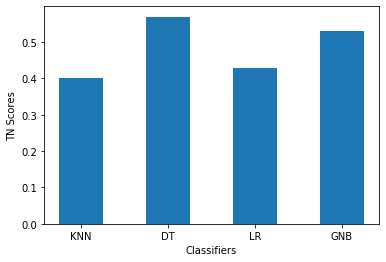

<Figure size 432x288 with 0 Axes>

In [25]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

Yplot = TNP
print(Yplot)
plt.bar(['KNN', 'DT', 'LR', 'GNB'], Yplot, 0.5)
plt.xlabel('Classifiers')
plt.ylabel('TN Scores')
plt.figure()
plt.show()

# Over Sampling
Random over sampler is used to overcome the bias. This generates artificial data and overcomes the bias. The random state is set to 2.

In [26]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=2)
X_resampled, y_resampled = ros.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, random_state=2)

After oversampling, more samples of the minority class is produced. We used random oversampler. reviewNotHelpfulness is at 47%.

The predicted score of k-NN classifier is 55%. It is now biased towards minority class.

The predicted score of Decision Tree classifier is 51%. It is now biased towards minority class.

The predicted score of Logistic Regression classifier is 44%. It is now slighly biased towards majority class.

The predicted score of Gaussian Naive Bayes Regression classifier is 44%. It is now slighly biased towards majority class.




In [27]:
models = [kNN,DT,LR,m3]
for m in models:
    print(type(m).__name__)

    y_pred = m.fit(X_train, y_train).predict(X_test)
    print(X_train.shape,X_test.shape)
    y_test.sum()/len(y_test)
    print("Review is not helpfull: %0.2f" % (1- (y_test.sum()/len(y_test))))
    print("Review is helpfull : %0.2f" % (1- (y_pred.sum()/len(y_pred))))

KNeighborsClassifier
(462, 23) (154, 23)
Review is not helpfull: 0.47
Review is helpfull : 0.55
DecisionTreeClassifier
(462, 23) (154, 23)
Review is not helpfull: 0.47
Review is helpfull : 0.55
LogisticRegression
(462, 23) (154, 23)
Review is not helpfull: 0.47
Review is helpfull : 0.44
GaussianNB
(462, 23) (154, 23)
Review is not helpfull: 0.47
Review is helpfull : 0.44


# Hold Out Testing
The overall accuracy of all the classifiers improved. 

Logistic regression Classifier has 75% accuracy. 

Decision tree Classifier has 79% accuracy. This classifier has the highest accuracy.

Gaussian Naive Bayes Classifier has 68% accuracy.

k-NN Classifier has 70% accuracy.


The accuracy scores of all classifiers improved after oversampling. 



In [28]:
from sklearn.metrics import accuracy_score

models = [kNN,DT,LR,m3]

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, random_state=0, test_size=1/3)
print('Accuracy Score')
for m in models:
    mm = m.fit(X_train, y_train)
    y_pred1 = mm.predict(X_test)
    f1s = f1_score(y_test, y_pred1) 
    print("F1 Score on Test set {:22} {:.2f}".format(type(m).__name__, f1s)) 

Accuracy Score
F1 Score on Test set KNeighborsClassifier   0.70
F1 Score on Test set DecisionTreeClassifier 0.79
F1 Score on Test set LogisticRegression     0.75
F1 Score on Test set GaussianNB             0.68


# Cross Validation
I performed 5-fold corss validation. 

The TN rate for logistic regression classifier is 69% and the Tp rate is 68%, so it is not biased. 

The TN rate for k-NN classifier is 76% and the Tp rate is 64%, so it is biased towards minority class.

The TN rate for Decision Tree classifier is 89% and the Tp rate is 70%, so it is highly biased towards minority class.

The TN rate for Gaussian Naive Bayes classifier is 65% and the Tp rate is 61%, so it is slightly biased towards minority class.




In [29]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix
def tp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 1]
def tn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 0]
def fp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 1]
def fn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 0]
scoring = {'tp' : make_scorer(tp), 'tn' : make_scorer(tn),
           'fp' : make_scorer(fp), 'fn' : make_scorer(fn)}

models = [kNN,DT,LR,m3]

folds = 5
v = 0 

In [30]:
for m in models:
    cv_results = cross_validate(m, X_resampled, y_resampled, cv= folds,scoring=scoring, return_train_score=False, 
                                    verbose = v, n_jobs = -1)
    fp_rate = cv_results['test_fp'].sum()/(cv_results['test_fp'].sum()+cv_results['test_tn'].sum())
    tp_rate = cv_results['test_tp'].sum()/(cv_results['test_tp'].sum()+cv_results['test_fn'].sum())
    tn_rate = cv_results['test_tn'].sum()/(cv_results['test_tn'].sum()+cv_results['test_fp'].sum())
  
    print("{} x CV {:22} FP: {:.2f}  TP: {:.2f} TN: {:.2f}".format(folds, type(m).__name__, fp_rate, tp_rate, tn_rate)) 

5 x CV KNeighborsClassifier   FP: 0.24  TP: 0.64 TN: 0.76
5 x CV DecisionTreeClassifier FP: 0.12  TP: 0.70 TN: 0.88
5 x CV LogisticRegression     FP: 0.31  TP: 0.69 TN: 0.69
5 x CV GaussianNB             FP: 0.35  TP: 0.61 TN: 0.65
